In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

In [2]:
model = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")


In [3]:
def embed(texts):
    return model(texts)

In [4]:
df = pd.read_csv('data_recom.csv')
df = df[["prompt", "shortdesc"]]

In [5]:
desc = list(df['shortdesc'])
embeddings = embed(desc)

In [6]:
normalized_embeddings = normalize(embeddings)

In [7]:
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(normalized_embeddings)

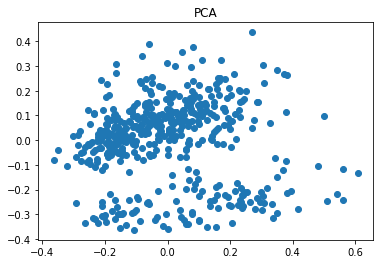

In [8]:
plt.title("PCA")
plt.scatter(emb_2d[:, 0], emb_2d[:, 1])
plt.show()

In [9]:
nn = NearestNeighbors(n_neighbors=5, metric='cosine')
nn.fit(normalized_embeddings)

NearestNeighbors(metric='cosine')

In [10]:
def recommend(text):
    emb = embed([text])
    normalized_emb = normalize(emb)
    neighbors = nn.kneighbors(normalized_emb, return_distance=False)[0]
    return df['prompt'].iloc[neighbors].tolist()

In [16]:
print('Recommended prompts:')
recommended_prompts = recommend("cara berlatih taichi untuk kesehatan")
print(recommended_prompts)

Recommended prompts:
['cara menikmati bacaan komik', 'cara mengajar Bahasa Inggris untuk pemula', 'cara berlatih taichi untuk kesehatan', 'cara memahami perkembangan kognitif pada remaja', 'cara merawat tanaman di kebun']
